In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from gensim.models import word2vec, FastText
import re
from sklearn.metrics import ( accuracy_score, roc_auc_score,
                             precision_score, recall_score,fbeta_score,
                             classification_report
                             )
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn import cluster, datasets, mixture
from sklearn import metrics
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

fileURL = "----"

data = pd.read_excel(fileURL)
data.head(5)

Unique ID   CWE-ID                                               Name  \
0          0  CWE-119  Improper Restriction of Operations within the ...   
1          0  CWE-119  Improper Restriction of Operations within the ...   
2          0  CWE-119  Improper Restriction of Operations within the ...   
3          0  CWE-119  Improper Restriction of Operations within the ...   
4          0  CWE-119  Improper Restriction of Operations within the ...   

                                         Description         CVE-ID  \
0  The software performs operations on a memory b...  CVE-2014-3488   
1  The software performs operations on a memory b...  CVE-2014-3488   
2  The software performs operations on a memory b...  CVE-2014-3488   
3  The software performs operations on a memory b...  CVE-2014-3488   
4  The software performs operations on a memory b...  CVE-2014-3488   

                                     CVE-Description BugTraq_Description  \
0  The SslHandler in Netty before 3.9.2 allows re...                 NaN   
1  The SslHandler in Netty before 3.9.2 allows re...                 NaN   
2  The SslHandler in Netty before 3.9.2 allows re...                 NaN   
3  The SslHandler in Netty before 3.9.2 allows re...                 NaN   
4  The SslHandler in Netty before 3.9.2 allows re...                 NaN   

                                SecurityPatchMessage Language  \
0  Fix a bug where SslHandler does not handle SSL...     java   
1  Fix a bug where SslHandler does not handle SSL...     java   
2  Fix a bug where SslHandler does not handle SSL...     java   
3  Fix a bug where SslHandler does not handle SSL...     java   
4  Fix a bug where SslHandler does not handle SSL...     java   

                                            GoodCode  
0  public void requestInitialized(HttpServletRequ...  
1  @Override\n        public void onScrollStateCh...  
2  @Override\n        public void onClick(View v)...  
3  @Override\n        public void onClick(View v)...  
4  @Override\n        public void onClick(View v)...

In [ ]:
data.shape

(5311, 10)

In [ ]:
df = data.drop(columns = ['CWE-ID','CVE-ID','Language'])

In [ ]:
df.shape

(5311, 7)

In [ ]:
df.apply(lambda x:sum(x.isnull()),axis=0)


Unique ID                  0
Name                       0
Description                0
CVE-Description            0
BugTraq_Description     5143
SecurityPatchMessage     524
GoodCode                   0
dtype: int64

In [ ]:
goodcode = df['GoodCode']
goodcode
//vector form of this at the end

0       public void requestInitialized(HttpServletRequ...
1       @Override\n        public void onScrollStateCh...
2       @Override\n        public void onClick(View v)...
3       @Override\n        public void onClick(View v)...
4       @Override\n        public void onClick(View v)...
                              ...                        
5306    private DocumentBuilder createDocumentBuilder(...
5307    protected boolean evaluate(InputSource inputSo...
5308    protected boolean evaluate(String text)\n   {\...
5309    private boolean load(ArrayList<String> errors,...
5310    protected void registerResources() throws Face...
Name: GoodCode, Length: 5311, dtype: object

In [ ]:
#!pip install --upgrade gensim


In [ ]:
# import gensim.models
# from gensim.models import word2vec
# corpus = []
# for col in df.GoodCode:
#    word_list = col.split(" ")
#    corpus.append(word_list)

# #show first value
# corpus[0:1]

# #generate vectors from corpus
# model = word2vec(corpus, min_count=1, size = 100)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/EvaluationTSE

/content/drive/MyDrive/EvaluationTSE


In [3]:
#!git clone https://github.com/tech-srl/code2vec

In [4]:
cd code2vec

/content/drive/MyDrive/EvaluationTSE/code2vec


In [5]:
ls

 build_extractor.sh         keras_checkpoint_saver_callback.py
 CITATION.cff               keras_model.py
 classifier.txt             keras_topk_word_predictions_layer.py
 code2vec.py                keras_word_prediction_layer.py
 code_results.txt           keras_words_subtoken_metrics.py
 common.py                  LICENSE
 config.py                  log.txt
 CSharpExtractor/           model_base.py
 extractor.py               models/
 file1.txt                  path_context_reader.py
 filebad.txt                preprocess_csharp.sh
'formData (1).txt'          preprocess.py
 formData.txt               preprocess.sh
 images/                    __pycache__/
 __init__.py                README.md
 Input.java                 requirements.txt
 interactive_predict.py     tensorflow_model.py
 java14m_model.tar.gz       test.java
 JavaExtractor/             train.sh
 keras_attention_layer.py   vocabularies.py


In [ ]:
# !wget https://s3.amazonaws.com/code2vec/model/java14m_model.tar.gz
# !tar -xvzf java14m_model.tar.gz

In [ ]:
!python code2vec.py --load models/java14_model/saved_model_iter8.release --predict --export_code_vectors

In [ ]:
ls

build_extractor.sh                  keras_topk_word_predictions_layer.py
CITATION.cff                        keras_word_prediction_layer.py
code2vec.py                         keras_words_subtoken_metrics.py
common.py                           LICENSE
config.py                           model_base.py
CSharpExtractor/                    models/
extractor.py                        path_context_reader.py
images/                             preprocess_csharp.sh
__init__.py                         preprocess.py
Input.java                          preprocess.sh
interactive_predict.py              __pycache__/
java14m_model.tar.gz                README.md
JavaExtractor/                      requirements.txt
keras_attention_layer.py            tensorflow_model.py
keras_checkpoint_saver_callback.py  train.sh
keras_model.py                      vocabularies.py


In [ ]:
!python3 code2vec.py --load models/java14_model/saved_model_iter8.release --save_w2v models/java14_model/tokens.txt


2022-08-06 16:24:39.804274: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-08-06 16:24:39,809 INFO     
2022-08-06 16:24:39,809 INFO     
2022-08-06 16:24:39,809 INFO     ---------------------------------------------------------------------
2022-08-06 16:24:39,809 INFO     ---------------------------------------------------------------------
2022-08-06 16:24:39,809 INFO     ---------------------- Creating code2vec model ----------------------
2022-08-06 16:24:39,809 INFO     ---------------------------------------------------------------------
2022-08-06 16:24:39,809 INFO     ---------------------------------------------------------------------
2022-08-06 16:24:39,809 INFO     Checking number of examples ...
2022-08-06 16:24:39,809 INFO     ---------------------------------------------------------------------
2022-08-06 16:24:39,809 INFO   

In [ ]:
!python3 code2vec.py --load models/java14_model/saved_model_iter8.release --save_t2v models/java14_model/targets.txt

2022-08-06 16:27:28.618367: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-08-06 16:27:28,620 INFO     
2022-08-06 16:27:28,620 INFO     
2022-08-06 16:27:28,620 INFO     ---------------------------------------------------------------------
2022-08-06 16:27:28,620 INFO     ---------------------------------------------------------------------
2022-08-06 16:27:28,620 INFO     ---------------------- Creating code2vec model ----------------------
2022-08-06 16:27:28,620 INFO     ---------------------------------------------------------------------
2022-08-06 16:27:28,620 INFO     ---------------------------------------------------------------------
2022-08-06 16:27:28,620 INFO     Checking number of examples ...
2022-08-06 16:27:28,620 INFO     ---------------------------------------------------------------------
2022-08-06 16:27:28,621 INFO   

In [ ]:
ls

build_extractor.sh                  keras_topk_word_predictions_layer.py
CITATION.cff                        keras_word_prediction_layer.py
code2vec.py                         keras_words_subtoken_metrics.py
common.py                           LICENSE
config.py                           model_base.py
CSharpExtractor/                    models/
extractor.py                        path_context_reader.py
images/                             preprocess_csharp.sh
__init__.py                         preprocess.py
Input.java                          preprocess.sh
interactive_predict.py              __pycache__/
java14m_model.tar.gz                README.md
JavaExtractor/                      requirements.txt
keras_attention_layer.py            tensorflow_model.py
keras_checkpoint_saver_callback.py  train.sh
keras_model.py                      vocabularies.py


In [ ]:
cd models/java14_model

/content/drive/MyDrive/EvaluationTSE/code2vec/models/java14_model


In [ ]:
ls

dictionaries.bin                               targets.txt
saved_model_iter8.release.data-00000-of-00001  tokens.txt
saved_model_iter8.release.index


In [ ]:
with open("targets.txt", "r", encoding='utf-8') as f:
    lines = f.readlines()
    print(lines[1])

<PAD_OR_OOV> -0.2573768 -0.13510205 0.093277276 -0.016592614 0.14470781 0.5471281 -0.11117865 -0.25889432 0.36192858 0.1988217 0.09903732 -0.6400073 0.12738596 0.07656002 0.028524349 0.30059007 -0.09129252 -0.07837201 -0.057307318 -0.09384325 0.048190493 -0.3030113 -0.37538192 0.051450048 0.3286459 -0.1974609 -0.23591723 -0.20111421 0.008572375 -0.40584373 0.2211914 0.036726143 -0.47905424 -0.014038366 0.39172664 0.33911046 0.589351 -0.14942683 0.2797378 -0.0013912081 -0.542576 0.44588205 -0.09396608 -0.14650382 -0.34489003 -0.06488918 -0.24833073 -0.1555814 0.13062944 0.031128814 0.23381303 -0.22141026 0.013622437 0.28652883 0.10788014 0.13143586 0.18965383 0.029292628 0.08823093 -0.13309848 -0.33922407 -0.10901694 -0.48110765 0.049926873 -0.20277019 -0.41492423 0.25176612 -0.11296221 -0.150336 0.32910836 0.08177365 -0.05126652 -0.12725475 -0.054434896 -0.53093857 0.108099766 -0.015501128 0.8442332 -0.35692707 0.045021366 -0.123440824 0.044303976 0.008877946 0.07762261 -0.10113047 0.7

In [ ]:
with open("tokens.txt", "r", encoding='utf-8') as f:
    lines = f.readlines()
    print(lines[1])

<PAD_OR_OOV> -0.018646957 -0.022318391 -0.031485185 -0.17608236 -0.012014123 0.091161594 0.21440405 0.009482101 -0.06939143 0.07835059 -0.033334088 0.06601218 -0.048325494 -0.06323206 -0.0658842 -0.020603098 -0.11070063 0.08307628 0.11314174 0.0192827 0.17006208 -0.0052179103 0.12535344 0.024526417 0.02644976 0.06708408 0.048302967 -0.08398792 -0.10483451 -0.14583968 -0.030113263 0.030542102 0.03765947 -0.11006852 0.071223564 -0.09937044 0.08020915 0.15535697 -0.02031789 0.08053272 -0.22588283 -0.047573116 -0.01174455 -0.03924219 -0.08897814 0.058685225 0.03696271 0.07089091 -0.16221829 0.19397087 -0.016767925 -0.09048844 -0.010275685 -0.05801329 -0.0036462138 -0.008860379 0.01402491 0.102958396 0.09746477 -0.040746752 -0.099066444 0.14821741 -0.031463724 0.24639387 0.044078067 0.16516115 0.051698733 -0.04058584 0.019704163 -0.12714888 -0.14063443 -0.10289475 0.13360876 -0.15146059 0.122662194 -0.021808265 0.025017723 0.063469164 0.021659652 0.17752883 -0.030332435 0.017664885 -0.05230

In [ ]:
cd /content/drive/MyDrive/EvaluationTSE/code2vec/

/content/drive/MyDrive/EvaluationTSE/code2vec


In [ ]:
import pandas as pd

bad_code = pd.read_csv('---', sep=" ", header=None)
good_code = pd.read_csv('----', sep=" ", header=None)

In [ ]:
bad_code.shape

(4978, 384)

In [ ]:
bad_code.head(5)

0         1         2         3         4         5         6    \
0  0.003244  0.619325  0.342555 -0.644817  0.249526 -0.760915  0.090449   
1 -0.705658 -0.312866  0.912183  0.265126 -0.549045  0.178885 -0.851371   
2  0.551908  0.913265  0.456881  0.757069  0.282783 -0.331643  0.193482   
3  0.188617  0.818500  0.156364  0.530089 -0.163276  0.195563  0.350385   
4 -0.520081  0.084647 -0.539246  0.584939  0.432577  0.134905  0.530689   

        7         8         9    ...       374       375       376       377  \
0  0.751687  0.518022 -0.862336  ... -0.072833 -0.681195  0.483196  0.002662   
1 -0.276093  0.668543  0.860348  ...  0.179349  0.363830 -0.062926  0.708363   
2  0.519914 -0.099808 -0.216962  ...  0.460764 -0.388483  0.776157 -0.289638   
3  0.069839 -0.241136 -0.333623  ...  0.195449 -0.714479  0.794128  0.232362   
4  0.862456  0.015429  0.572228  ... -0.358286 -0.459476  0.812694 -0.380580   

        378       379       380       381       382       383  
0 -0.625494  0.564635 -0.422164  0.512477 -0.708866  0.739467  
1 -0.319232  0.461169 -0.484581 -0.499358 -0.889268 -0.054601  
2 -0.047460  0.682752  0.843734  0.541254  0.135980  0.228888  
3  0.685299  0.641355  0.699323  0.103796  0.582486 -0.012167  
4 -0.358947  0.262488  0.792947 -0.433971  0.201261  0.145127  

[5 rows x 384 columns]

In [ ]:
good_code.shape

(5311, 384)

In [ ]:
good_code.head(5)

0         1         2         3         4         5         6    \
0 -0.332519 -0.507997 -0.460200  0.963342  0.011023  0.693155  0.654291   
1 -0.684925 -0.977033  0.554075  0.741868 -0.755340  0.400982 -0.101059   
2  0.049488 -0.321982  0.481149  0.559293 -0.477846 -0.088776 -0.544738   
3 -0.477720 -0.181710  0.782696  0.703637 -0.538589  0.176168 -0.644833   
4 -0.477720 -0.181710  0.782696  0.703637 -0.538589  0.176168 -0.644833   

        7         8         9    ...       374       375       376       377  \
0 -0.424962  0.556896 -0.239191  ...  0.209084  0.125454 -0.836822 -0.032643   
1 -0.793478  0.577829  0.978141  ...  0.156667  0.995459  0.666835 -0.391179   
2  0.305496  0.745171  0.336244  ...  0.147505  0.178540 -0.106070  0.550446   
3 -0.381509  0.915610  0.662476  ...  0.313697  0.561529 -0.453754  0.356047   
4 -0.381509  0.915610  0.662476  ...  0.313697  0.561529 -0.453754  0.356047   

        378       379       380       381       382       383  
0 -0.445598  0.254670  0.236288  0.715821  0.572888 -0.222023  
1  0.883110  0.877034 -0.130895  0.523506 -0.949955  0.878498  
2 -0.035108 -0.196799  0.188153 -0.125913 -0.728711 -0.253926  
3 -0.173129  0.507116 -0.354761  0.340218 -0.857288 -0.379975  
4 -0.173129  0.507116 -0.354761  0.340218 -0.857288 -0.379975  

[5 rows x 384 columns]

//how to apply random forest on the good code and bad code embeddings
//pruning rf -similarity criteria, accuracy detection
//anything to be added in the dataset???????????????????????????

In [ ]:
import numpy as np
X1 = np.array(bad_code) #list to array
X2 = np.array(good_code)


array([-7.05658200e-01, -3.12865880e-01,  9.12182570e-01,  2.65125800e-01,
       -5.49044850e-01,  1.78884740e-01, -8.51370600e-01, -2.76093130e-01,
        6.68542500e-01,  8.60347750e-01, -8.22831100e-02, -6.96187600e-02,
        3.21816120e-01,  6.54329300e-01, -7.82963100e-01,  6.96080570e-01,
       -2.04253700e-01, -6.86959560e-01,  4.97058900e-01,  2.30699100e-01,
       -2.45161800e-01, -5.56084140e-02,  5.06399300e-01, -4.89969730e-01,
       -3.22193200e-01,  5.52676900e-01, -2.58988140e-01, -6.82796540e-01,
        6.06025100e-01,  2.06525560e-01,  9.02968300e-01,  3.81379050e-02,
        5.07465700e-01,  2.28556260e-01, -6.64572060e-01, -4.95945040e-01,
       -4.37790570e-01,  2.30995940e-01, -5.41098100e-01, -2.32009170e-01,
        2.78953080e-01, -4.99036130e-01,  4.36881330e-01, -6.16460740e-01,
       -2.68623680e-01,  4.54663930e-01, -4.66487770e-01,  5.22065700e-02,
        2.80658870e-01, -4.03864700e-03,  4.05391830e-02,  6.51682260e-01,
       -2.90314820e-01, -

In [ ]:
data = data2 = "" 
filename3 = "/content/drive/MyDrive/EvaluationTSE/code2vec/file3.txt"
# Reading data from first file 
with open(filename1) as fp: 
    data = fp.read() 
with open(filename2) as fp: 
    data2 = fp.read() 
# Merging two files into one another file 
data += "\n"
data += data2 
with open ('file3.txt', 'w') as fp: 
  fp.write(data)

In [ ]:
gcode.head(5)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
code = pd.read_csv("/content/drive/MyDrive/EvaluationTSE/code2vec/formData.txt", sep=',', header=None)

In [4]:
code = code[code.columns[:-1]]
code.head(5)

0         1         2         3         4         5         6    \
0 -0.332519 -0.507997 -0.460200  0.963342  0.011023  0.693155  0.654291   
1 -0.684925 -0.977033  0.554075  0.741868 -0.755340  0.400982 -0.101059   
2  0.049488 -0.321982  0.481149  0.559293 -0.477846 -0.088776 -0.544738   
3 -0.477720 -0.181710  0.782696  0.703637 -0.538589  0.176168 -0.644833   
4 -0.477720 -0.181710  0.782696  0.703637 -0.538589  0.176168 -0.644833   

        7         8         9    ...       375       376       377       378  \
0 -0.424962  0.556896 -0.239191  ...  0.125454 -0.836822 -0.032643 -0.445598   
1 -0.793478  0.577829  0.978141  ...  0.995459  0.666835 -0.391179  0.883110   
2  0.305496  0.745171  0.336244  ...  0.178540 -0.106070  0.550446 -0.035108   
3 -0.381509  0.915610  0.662476  ...  0.561529 -0.453754  0.356047 -0.173129   
4 -0.381509  0.915610  0.662476  ...  0.561529 -0.453754  0.356047 -0.173129   

        379       380       381       382       383  384  
0  0.254670  0.236288  0.715821  0.572888 -0.222023    0  
1  0.877034 -0.130895  0.523506 -0.949955  0.878498    0  
2 -0.196799  0.188153 -0.125913 -0.728711 -0.253926    0  
3  0.507116 -0.354761  0.340218 -0.857288 -0.379975    0  
4  0.507116 -0.354761  0.340218 -0.857288 -0.379975    0  

[5 rows x 385 columns]

In [5]:
from sklearn.utils import shuffle
code = shuffle(code)
print(code.head(5))

           0         1         2         3         4         5         6    \
9239 -0.469987  0.924577  0.560366  0.239170 -0.151289 -0.608082  0.768374   
9376 -0.745080  0.907950 -0.727221 -0.750114 -0.944017 -0.283307 -0.602997   
7792  0.982868 -0.514649  0.017692  0.891233 -0.054202  0.046016  0.722116   
4603 -0.660093 -0.999137  0.186592 -0.998022  0.710728 -0.723244  0.391308   
637   0.212734  0.398261 -0.403061  0.421630 -0.747891  0.223118 -0.270069   

           7         8         9    ...       375       376       377  \
9239  0.301871  0.416647  0.972500  ...  0.213072  0.049633  0.485792   
9376 -0.867930 -0.179387 -0.558464  ...  0.835257 -0.513995  0.179895   
7792  0.289760  0.016754  0.266671  ... -0.869361  0.962586 -0.908999   
4603  0.835635  0.486969  0.998655  ...  0.915955 -0.054893 -0.385101   
637  -0.143614 -0.300784  0.021258  ...  0.182553 -0.699092  0.483366   

           378       379       380       381       382       383  384  
9239  0.426617 -0.76

In [6]:
X = code.iloc[:,:].values

z=pd.DataFrame(X)
z

0         1         2         3         4         5         6    \
0     -0.469987  0.924577  0.560366  0.239170 -0.151289 -0.608082  0.768374   
1     -0.745080  0.907950 -0.727221 -0.750114 -0.944017 -0.283307 -0.602997   
2      0.982868 -0.514649  0.017692  0.891233 -0.054202  0.046016  0.722116   
3     -0.660093 -0.999137  0.186592 -0.998022  0.710728 -0.723244  0.391308   
4      0.212734  0.398261 -0.403061  0.421630 -0.747891  0.223118 -0.270069   
...         ...       ...       ...       ...       ...       ...       ...   
10284 -0.993341 -0.441410 -0.898200  0.764198 -0.125487  0.240505 -0.922741   
10285 -0.220228  0.084175 -0.434252  0.331814 -0.969084  0.192601 -0.139185   
10286  0.311166  0.102895  0.701147  0.440727  0.665474  0.471102  0.386871   
10287 -0.477290  0.344271  0.814344  0.186218  0.386773  0.137255  0.261557   
10288 -0.405123  0.727917  0.502218  0.948828 -0.993722 -0.855061  0.977345   

            7         8         9    ...       375       376       377  \
0      0.301871  0.416647  0.972500  ...  0.213072  0.049633  0.485792   
1     -0.867930 -0.179387 -0.558464  ...  0.835257 -0.513995  0.179895   
2      0.289760  0.016754  0.266671  ... -0.869361  0.962586 -0.908999   
3      0.835635  0.486969  0.998655  ...  0.915955 -0.054893 -0.385101   
4     -0.143614 -0.300784  0.021258  ...  0.182553 -0.699092  0.483366   
...         ...       ...       ...  ...       ...       ...       ...   
10284 -0.915973 -0.588586 -0.646103  ...  0.973004 -0.448206 -0.878633   
10285 -0.474299 -0.285991  0.747183  ... -0.401164 -0.532902  0.604347   
10286 -0.569796 -0.359771  0.585588  ...  0.686696 -0.674870  0.747438   
10287  0.256922 -0.436674  0.383890  ...  0.262639  0.644523  0.119834   
10288 -0.314752 -0.981679  0.920694  ... -0.648372  0.804333 -0.745447   

            378       379       380       381       382       383  384  
0      0.426617 -0.762489  0.082046  0.072262 -0.691055 -0.174701  1.0  
1      0.558566  0.929982 -0.375335  0.897805  0.811183  0.400274  1.0  
2      0.052941 -0.760451  0.996357  0.831447 -0.359806  0.985379  1.0  
3      0.586839 -0.597117 -0.691755 -0.445644 -0.459809  0.969748  0.0  
4      0.503544  0.508820 -0.205070  0.341253 -0.196508 -0.474558  0.0  
...         ...       ...       ...       ...       ...       ...  ...  
10284  0.985998  0.081596  0.393177  0.013732 -0.739823 -0.020677  0.0  
10285  0.846045  0.935298  0.451936 -0.626460 -0.516424 -0.709760  0.0  
10286 -0.449250 -0.830355 -0.814611 -0.717325 -0.796101  0.261980  0.0  
10287  0.412065 -0.060398  0.282255  0.041212  0.592328  0.741041  0.0  
10288 -0.496621 -0.969849  0.684699 -0.955114 -0.776564  0.983952  0.0  

[10289 rows x 385 columns]

In [7]:
X=z.loc[:,:383]
y=code.iloc[:,-1]
print(y)

9239    1
9376    1
7792    1
4603    0
637     0
       ..
635     0
1729    0
2824    0
82      0
4884    0
Name: 384, Length: 10289, dtype: int64


In [8]:
print(X)

            0         1         2         3         4         5         6    \
0     -0.469987  0.924577  0.560366  0.239170 -0.151289 -0.608082  0.768374   
1     -0.745080  0.907950 -0.727221 -0.750114 -0.944017 -0.283307 -0.602997   
2      0.982868 -0.514649  0.017692  0.891233 -0.054202  0.046016  0.722116   
3     -0.660093 -0.999137  0.186592 -0.998022  0.710728 -0.723244  0.391308   
4      0.212734  0.398261 -0.403061  0.421630 -0.747891  0.223118 -0.270069   
...         ...       ...       ...       ...       ...       ...       ...   
10284 -0.993341 -0.441410 -0.898200  0.764198 -0.125487  0.240505 -0.922741   
10285 -0.220228  0.084175 -0.434252  0.331814 -0.969084  0.192601 -0.139185   
10286  0.311166  0.102895  0.701147  0.440727  0.665474  0.471102  0.386871   
10287 -0.477290  0.344271  0.814344  0.186218  0.386773  0.137255  0.261557   
10288 -0.405123  0.727917  0.502218  0.948828 -0.993722 -0.855061  0.977345   

            7         8         9    ...       374 

In [9]:
code.shape

(10289, 385)

In [10]:
X.value_counts

<bound method DataFrame.value_counts of             0         1         2         3         4         5         6    \
0     -0.469987  0.924577  0.560366  0.239170 -0.151289 -0.608082  0.768374   
1     -0.745080  0.907950 -0.727221 -0.750114 -0.944017 -0.283307 -0.602997   
2      0.982868 -0.514649  0.017692  0.891233 -0.054202  0.046016  0.722116   
3     -0.660093 -0.999137  0.186592 -0.998022  0.710728 -0.723244  0.391308   
4      0.212734  0.398261 -0.403061  0.421630 -0.747891  0.223118 -0.270069   
...         ...       ...       ...       ...       ...       ...       ...   
10284 -0.993341 -0.441410 -0.898200  0.764198 -0.125487  0.240505 -0.922741   
10285 -0.220228  0.084175 -0.434252  0.331814 -0.969084  0.192601 -0.139185   
10286  0.311166  0.102895  0.701147  0.440727  0.665474  0.471102  0.386871   
10287 -0.477290  0.344271  0.814344  0.186218  0.386773  0.137255  0.261557   
10288 -0.405123  0.727917  0.502218  0.948828 -0.993722 -0.855061  0.977345   

           

In [11]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 9239    1
9376    1
7792    1
4603    0
637     0
       ..
635     0
1729    0
2824    0
82      0
4884    0
Name: 384, Length: 10289, dtype: int64>

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
print(scaled)

[[0.26460183 0.9625226  0.7808612  ... 0.535831   0.15314392 0.41235375]
 [0.12687068 0.95420482 0.13634155 ... 0.9489031  0.90577942 0.70001102]
 [0.99200483 0.24252329 0.50921815 ... 0.91569972 0.31910254 0.99273607]
 ...
 [0.65570286 0.5514611  0.85133124 ... 0.14075059 0.10051484 0.63082315]
 [0.26094549 0.67221379 0.90799354 ... 0.52029519 0.79613085 0.87049522]
 [0.2970774  0.86413977 0.75175455 ... 0.02176983 0.11030304 0.99202218]]


In [13]:
X = pd.DataFrame(scaled)
print(X)

            0         1         2         3         4         5         6    \
0      0.264602  0.962523  0.780861  0.622989  0.424347  0.197960  0.884321   
1      0.126871  0.954205  0.136342  0.125606  0.027938  0.362648  0.198431   
2      0.992005  0.242523  0.509218  0.950828  0.472895  0.529642  0.861185   
3      0.169422  0.000149  0.593763  0.000964  0.855404  0.139564  0.695732   
4      0.606421  0.699223  0.298604  0.714725  0.126012  0.619447  0.364945   
...         ...       ...       ...       ...       ...       ...       ...   
10284  0.002573  0.279162  0.050755  0.886958  0.437249  0.628264  0.038511   
10285  0.389649  0.542096  0.282991  0.669568  0.015403  0.603973  0.430406   
10286  0.655703  0.551461  0.851331  0.724326  0.832774  0.745195  0.693513   
10287  0.260945  0.672214  0.907994  0.596366  0.693408  0.575907  0.630837   
10288  0.297077  0.864140  0.751755  0.979785  0.003082  0.072721  0.988838   

            7         8         9    ...       374 

In [69]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
print(RandomForestClassifier())
print(RandomForestRegressor())

RandomForestClassifier()
RandomForestRegressor()


In [16]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
predictions = clf.predict(X_test)
print(predictions[:5])
print(accuracy_score(y_test, predictions))

[1 0 1 0 0]
0.2588273404599935


In [18]:
prec_rec = classification_report(predictions, y_test)
print("CLASSIFICATION REPORT")
print(prec_rec)
print("precision", metrics.average_precision_score(y_test, predictions))
print("recall", metrics.recall_score(y_test, predictions))
print("f1", metrics.f1_score(y_test, predictions))
print("f2", metrics.fbeta_score(y_test,predictions, beta=2))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.36      0.31      0.33      1839
           1       0.15      0.18      0.16      1248

    accuracy                           0.26      3087
   macro avg       0.26      0.25      0.25      3087
weighted avg       0.28      0.26      0.27      3087

precision 0.43647859711059184
recall 0.15053763440860216
f1 0.16374269005847955
f2 0.15555555555555556


In [19]:
# rfc = RandomForestClassifier()
# parameters = {
#     "n_estimators":[10,100,250,500,750],
#     "max_depth":[8,16,32,None]
    
# }

In [23]:
from sklearn.model_selection import GridSearchCV
# cv = GridSearchCV(rfc,parameters,cv=5)
# cv.fit(X,y.values.ravel())

In [ ]:
# def display(results):
#     print(f'Best parameters are: {results.best_params_}')
#     print("\n")
#     mean_score = results.cv_results_['mean_test_score']
#     std_score = results.cv_results_['std_test_score']
#     params = results.cv_results_['params']
#     for mean,std,params in zip(mean_score,std_score,params):
#         print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
# display(cv)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# X, y = make_classification(n_samples=10, n_features=4,
#                            n_informative=2, n_redundant=0, 
#                            random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100)
#clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


prec_rec = classification_report(y_pred, y_test)
print("CLASSIFICATION REPORT")
print(prec_rec)
print("precision", metrics.average_precision_score(y_test, y_pred))
print("recall", metrics.recall_score(y_test, y_pred))
print("f1", metrics.f1_score(y_test, y_pred))
print("f2", metrics.fbeta_score(y_test,y_pred, beta=2))

Accuracy: 0.25008098477486235
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.29      0.29      0.29      1645
           1       0.20      0.21      0.21      1442

    accuracy                           0.25      3087
   macro avg       0.25      0.25      0.25      3087
weighted avg       0.25      0.25      0.25      3087

precision 0.4234505585061544
recall 0.20446851726472579
f1 0.2069201781431997
f2 0.2054421768707483


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=30, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.663
Accuracy score (validation): 0.276
Learning rate:  0.075
Accuracy score (training): 0.663
Accuracy score (validation): 0.274
Learning rate:  0.1
Accuracy score (training): 0.663
Accuracy score (validation): 0.272
Learning rate:  0.25
Accuracy score (training): 0.663
Accuracy score (validation): 0.271
Learning rate:  0.5
Accuracy score (training): 0.663
Accuracy score (validation): 0.276
Learning rate:  0.75
Accuracy score (training): 0.663
Accuracy score (validation): 0.268
Learning rate:  1
Accuracy score (training): 0.663
Accuracy score (validation): 0.274


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_features=2, max_depth=30, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))
print("precision", metrics.average_precision_score(y_test, y_pred))
print("recall", metrics.recall_score(y_test, y_pred))
print("f1", metrics.f1_score(y_test, y_pred))
print("f2", metrics.fbeta_score(y_test,y_pred, beta=2))

Accuracy: 0.2617427923550373
Classification Report
              precision    recall  f1-score   support

           0       0.32      0.40      0.36      1576
           1       0.16      0.12      0.13      1511

    accuracy                           0.26      3087
   macro avg       0.24      0.26      0.25      3087
weighted avg       0.24      0.26      0.25      3087

precision 0.43602808891220973
recall 0.20052945069490405
f1 0.21114982578397212
f2 0.2046467648250709


In [37]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_test, y_test)
y_pred = xgb_clf.predict(X_test)
print(score)
print("precision", metrics.average_precision_score(y_test, y_pred))
print("recall", metrics.recall_score(y_test, y_pred))
print("f1", metrics.f1_score(y_test, y_pred))
print("f2", metrics.fbeta_score(y_test,y_pred, beta=2))

0.33138969873663754
precision 0.44934410893621335
recall 0.15354070152217075
f1 0.18354430379746833
f2 0.16428267950715197


In [ ]:
# splitting the data-RANDOM REGRESSOR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rf = RandomForestRegressor(min_samples_leaf=5).fit(X_train, y_train)
print("Training Score:{:.3f}".format(rf.score(X_train, y_train)))
print("Testing Score:{:.3f}".format(rf.score(X_test, y_test)))

avg_cross_val = cross_val_score(rf, X_test, y_test, cv=5).mean()
print("Validation Score:{:.3f}".format(avg_cross_val))


# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 20, 40],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

Training Score:0.232
Testing Score:-0.628
Validation Score:-0.299


In [39]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8, 16, 32],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 16, 32],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [40]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [38]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=8)
rfc1.fit(X, y)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

prec_rec = classification_report(pred, y_test)
print("CLASSIFICATION REPORT")
print(prec_rec)
print("precision", metrics.average_precision_score(y_test, pred))
print("recall", metrics.recall_score(y_test, pred))
print("f1", metrics.f1_score(y_test, pred))
print("f2", metrics.fbeta_score(y_test,pred, beta=2))

Accuracy for Random Forest on CV data:  0.547457078069323
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.92      0.54      0.68      2761
           1       0.14      0.62      0.23       326

    accuracy                           0.55      3087
   macro avg       0.53      0.58      0.45      3087
weighted avg       0.84      0.55      0.63      3087

precision 0.49828268856850255
recall 0.13744075829383887
f1 0.22518025513033832
f2 0.1628168110362528


PRUNING

In [ ]:
class PrunedRandomForest:


    def __init__(self, n_clusters = 10 , n_estimators = 100, cv = 5):
        """ this is the unpruned random forest """
        self.rf = RandomForestClassifier(n_estimators = n_estimators, max_depth=8, criterion='entropy', max_features='log2')

        """ this is the final pruned random forest """
        self.prf = None 
        self.prf1 = None 

        
        """this is a list of decision tree object present in original unpruned random forest"""
        self.decision_trees = None 
        
        """number of clusters for pruning"""
        self.n_clusters = n_clusters 
        
        

        """ 
            this contains dictionary of lists where each element of dictionary represetns a
            pair (cluster_idx, tree_idx_list)

            where tree_idx_list is list of decision tree indices and cluster_idx is index of cluster 
            e.g.
            
            {
                0 : [2, 0]
                1 : [1, 3]
            }
            it means decision tree at 2nd index and 0th index 
            are in same cluster similarly 1st and 3rd in second cluster

        """ 
        self.clusters = {}
        
        self.cv = cv


        """
            Information about all trees in the random forest present in this 
            form
            {
                idx : { 
                    accuracy : 89.34
                    cluster : 2
                }

                idx1 : {

                }
            }
        """
        self.info = {}
        #self.maxs_accuracy = {}
        self.fimps = None

    def prune(self):
        pass

    
    def fit(self, X, y):
        self.rf.fit(X,y)
        self.decision_trees = self.rf.estimators_
        self.create_feature_imp_clusters()
        self.create_feature_imp_clusters1()
        self.create_fimp_agglomerative()
        self.create_fimp_gaussian()
        self.create_fimp_spectral_clustering()
        #self.plot_clusters(X,y)
        #self.all_algorithms()

        self.fill_info(X, y)
        #self.max_accuracy(X,y)
        self.prune()

    def fill_info(self, X, y):
        for idx, tree in enumerate(self.decision_trees):
            self.info[idx] = self.fill_for_tree(tree, X, y)

        for cluster_idx in self.clusters:
            for tree_idx in self.clusters[cluster_idx]:
                self.info[tree_idx]["cluster_idx"] = cluster_idx 
       

    """
        {
            "accuracy" : 98.45,
            
        } 
    """


    def fill_for_tree(self, tree, X, y):
        info = {}
        mean_score = cross_val_score(tree, X, y, cv=self.cv).mean()
        info["accuracy"] = (mean_score)
        return info

    def predict(self, X):
        if(self.prf is None):
            return None
        
        return self.prf.predict(X)

    
    def get_decision_trees(self):
        return self.decision_trees

    def get_feature_imps_from_rf(self):
        feature_imp_list = []
        dts = self.get_decision_trees()
        for tree in dts:
            feature_imp_list.append(tree.feature_importances_)
        return feature_imp_list

    def create_feature_imp_clusters(self):
        fimps = self.get_feature_imps_from_rf()
        #print(fimps)
        #print("KMEANS")
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=0).fit(fimps)

        print(" fimps len = " + str(len(fimps)))
        labels = kmeans.labels_
        score = silhouette_score(fimps, labels, metric='euclidean')
        print('Silhouetter Score: %.3f' % score)
        #print(labels)
        print(" kmeans.labels_ len = " + str(len(kmeans.labels_)))
        for (tree_idx, cluster_idx) in enumerate(kmeans.labels_):
            if cluster_idx in self.clusters:
                self.clusters[cluster_idx].append(tree_idx)
            else:
                self.clusters[cluster_idx] = [tree_idx]
        
    def create_feature_imp_clusters1(self):
        fimps = self.get_feature_imps_from_rf()
        #print("DBSCAN-")
        dbscan = DBSCAN().fit(fimps)

        print(" fimps len = " + str(len(fimps)))
        labels = dbscan.labels_
        #print(labels)
        print(" dbscan.labels_ len = " + str(len(labels)))
        

    def create_fimp_agglomerative(self):
        fimps = self.get_feature_imps_from_rf()
        #print("AGGLOMERATIVE CLUSTERING-")
        groups = AgglomerativeClustering(n_clusters=self.n_clusters).fit(fimps)
        #print(groups.labels_)

    def create_fimp_gaussian(self):
      fimps = self.get_feature_imps_from_rf()
      #print("GAUSSIAN CLUSTERING-")
      gmm =GaussianMixture(n_components = 5)
      gmm.fit(fimps)
      labelsgmm = gmm.predict(fimps)
      #print(labelsgmm)
      
    def create_fimp_spectral_clustering(self):
      fimps = self.get_feature_imps_from_rf()
      models = SpectralClustering(n_clusters=6, random_state=25, n_neighbors=8, affinity='nearest_neighbors')
      models.fit(fimps)
      labelsx = models.fit_predict(fimps)
      #print(labelsx)


In [ ]:
prf = PrunedRandomForest(20, 200)
prf.fit(X, y)
print('KMEANS-')
for cluster_idx in prf.clusters:
          print(str(cluster_idx) + " ==> ", prf.clusters[cluster_idx])

prf1 = PrunedRandomForest()
prf1.fit(X, y)
print('DBSCAN-')
for cluster_idx in prf1.clusters:
          print(str(cluster_idx) + " ==> ", prf1.clusters[cluster_idx])

prf2 = PrunedRandomForest()
prf2.fit(X, y)
print('AGGLO')
for cluster_idx in prf2.clusters:
          print(str(cluster_idx) + " ==> ", prf2.clusters[cluster_idx])

prf3 = PrunedRandomForest()
prf3.fit(X,y)
print('Gaussian')
for cluster_idx in prf3.clusters:
          print(str(cluster_idx) + " ==> ", prf3.clusters[cluster_idx])

prf4 = PrunedRandomForest()
prf4.fit(X,y)
print('spectral clustering')
for cluster_idx in prf4.clusters:
          print(str(cluster_idx) + " ==> ", prf4.clusters[cluster_idx])


 fimps len = 200
Silhouetter Score: -0.007
 kmeans.labels_ len = 200
 fimps len = 200
 dbscan.labels_ len = 200
KMEANS-
19 ==>  [0, 2, 8, 12, 22, 23, 27, 34, 45, 47, 48, 54, 55, 59, 62, 64, 65, 74, 77, 78, 80, 82, 83, 106, 108, 113, 121, 123, 127, 131, 136, 149, 155, 159, 163, 169, 176, 184, 187, 189, 191, 196, 198]
9 ==>  [1, 46, 61, 112, 125, 132, 141, 145, 166, 167, 183, 194, 197]
1 ==>  [3, 4, 5, 9, 16, 17, 19, 24, 26, 30, 32, 39, 40, 41, 43, 58, 71, 75, 91, 93, 98, 100, 104, 109, 111, 117, 118, 124, 128, 139, 148, 150, 154, 158, 162, 171, 178, 188]
13 ==>  [6]
16 ==>  [7, 29, 33, 51, 60, 63, 68, 152]
2 ==>  [10, 86, 153, 199]
17 ==>  [11, 15, 20, 28, 36, 42, 49, 50, 57, 66, 69, 70, 73, 76, 79, 85, 89, 92, 95, 101, 102, 120, 129, 130, 134, 137, 138, 140, 142, 147, 151, 156, 157, 160, 164, 170, 175, 185, 186, 192]
4 ==>  [13, 21, 38, 44, 53, 56, 72, 84, 87, 94, 99, 110, 115, 133, 144, 168, 173, 174, 177, 181, 182, 190]
12 ==>  [14, 18, 25, 31, 35, 37, 52, 67, 81, 88, 90, 105, 107, 1

In [ ]:
prf.get_feature_imps_from_rf()

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.43609690e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.13438412e-02,
        2.96990736e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.12772130e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.27171445e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.39190688e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [ ]:
prf.info

{0: {'accuracy': 0.4600032693124475, 'cluster_idx': 19},
 1: {'accuracy': 0.4729332110648274, 'cluster_idx': 9},
 2: {'accuracy': 0.4815810621769369, 'cluster_idx': 19},
 3: {'accuracy': 0.4785696569064461, 'cluster_idx': 1},
 4: {'accuracy': 0.46622422286506104, 'cluster_idx': 1},
 5: {'accuracy': 0.4649594902896223, 'cluster_idx': 1},
 6: {'accuracy': 0.45835245550404335, 'cluster_idx': 13},
 7: {'accuracy': 0.4717670303068099, 'cluster_idx': 16},
 8: {'accuracy': 0.4818739302096281, 'cluster_idx': 19},
 9: {'accuracy': 0.4748752393519391, 'cluster_idx': 1},
 10: {'accuracy': 0.47953618283204663, 'cluster_idx': 2},
 11: {'accuracy': 0.47681948812582886, 'cluster_idx': 17},
 12: {'accuracy': 0.45873915091420275, 'cluster_idx': 19},
 13: {'accuracy': 0.47545781004255294, 'cluster_idx': 4},
 14: {'accuracy': 0.4763326818330638, 'cluster_idx': 12},
 15: {'accuracy': 0.46806821902314644, 'cluster_idx': 17},
 16: {'accuracy': 0.4693379122605358, 'cluster_idx': 1},
 17: {'accuracy': 0.48372

In [ ]:
# Highest acuracy selection-Cluster Representative
def getMaxAccuracyCluster(dicts):
    clusterObj = {}
    for key, value in dicts.items():
      if(clusterObj.get(str(value["cluster_idx"])) != None):
        clusterObj[str(value["cluster_idx"])].append({"index" : key, "accuracy" : value['accuracy']})
      else:
        clusterObj[str(value["cluster_idx"])] = []
        clusterObj[str(value["cluster_idx"])].append({"index" : key, "accuracy" : value['accuracy']})
    #Restructured the object so the key for dictionary is cluster_idx
    #Now you can access all the accuracies of cluster as below
    #print(clusterObj["2"])
    clusterMaxAccuracyObj = {}
    for clusterIndex in clusterObj.keys():
      max_acc = -1;
      for obj in clusterObj[clusterIndex]:
        if obj['accuracy'] == max_acc:
          clusterMaxAccuracyObj[str(clusterIndex)].append(obj['index'])
        if obj['accuracy'] > max_acc:
          max_acc = obj['accuracy']
          clusterMaxAccuracyObj[str(clusterIndex)] = []
          clusterMaxAccuracyObj[str(clusterIndex)].append(obj['index'])
    print(clusterMaxAccuracyObj)
    dict1 = {}
    print("Selecting first maximum accuracy of a decision tree in each cluster:")
    for key,val in clusterMaxAccuracyObj.items():
      output = {key : val[0]}
      print(output)
    return clusterMaxAccuracyObj

In [ ]:
getMaxAccuracyCluster(prf.info)

{'19': [48], '9': [166], '1': [124], '13': [6], '16': [60], '2': [86], '17': [151], '4': [84], '12': [122], '3': [96], '18': [97], '6': [103], '15': [119], '14': [126], '7': [143], '8': [146], '0': [172], '11': [179], '10': [180], '5': [193]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'19': 48}
{'9': 166}
{'1': 124}
{'13': 6}
{'16': 60}
{'2': 86}
{'17': 151}
{'4': 84}
{'12': 122}
{'3': 96}
{'18': 97}
{'6': 103}
{'15': 119}
{'14': 126}
{'7': 143}
{'8': 146}
{'0': 172}
{'11': 179}
{'10': 180}
{'5': 193}


{'19': [48],
 '9': [166],
 '1': [124],
 '13': [6],
 '16': [60],
 '2': [86],
 '17': [151],
 '4': [84],
 '12': [122],
 '3': [96],
 '18': [97],
 '6': [103],
 '15': [119],
 '14': [126],
 '7': [143],
 '8': [146],
 '0': [172],
 '11': [179],
 '10': [180],
 '5': [193]}

In [ ]:
def getTreeList(X, dicts):
    treeIdxs = []
    for trees in dicts.values():
        treeIdxs.append(trees[0])
    return treeIdxs

stored_ypred = []
def predict(X, treeList, prf):
    ypred = []
    for treeIdx in treeList:
        print(prf.decision_trees[treeIdx].predict(X))
        ypred.append(prf.decision_trees[treeIdx].predict(X))
    stored_ypred.append(ypred)
    print(type(ypred))
    return getMajorityLabels(ypred)

def getMajorityLabels(pred):
    predNp = np.array(pred)
    rows,cols = predNp.shape
    res = []
    for colIdx in range(cols):
        col = list(predNp[:, colIdx])
        res.append(max(set(col), key = col.count))
    return res




In [ ]:
treeList = getTreeList(X, getMaxAccuracyCluster(prf.info))

y_preed = predict(X_test, treeList, prf)

print("final answer = ", y_preed)
  
print("testing target data:",y_test)
  
print("Accuracy:",metrics.accuracy_score(y_test, y_preed))

{'19': [48], '9': [166], '1': [124], '13': [6], '16': [60], '2': [86], '17': [151], '4': [84], '12': [122], '3': [96], '18': [97], '6': [103], '15': [119], '14': [126], '7': [143], '8': [146], '0': [172], '11': [179], '10': [180], '5': [193]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'19': 48}
{'9': 166}
{'1': 124}
{'13': 6}
{'16': 60}
{'2': 86}
{'17': 151}
{'4': 84}
{'12': 122}
{'3': 96}
{'18': 97}
{'6': 103}
{'15': 119}
{'14': 126}
{'7': 143}
{'8': 146}
{'0': 172}
{'11': 179}
{'10': 180}
{'5': 193}
[0. 0. 0. ... 0. 0. 1.]
[0. 0. 0. ... 0. 0. 1.]
[0. 0. 0. ... 1. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 1. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 1. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 0. ... 1. 1. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 1. ... 0. 1. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 1. ... 1. 1. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 1. 1. 1.]
[0. 0. 0. 

In [ ]:
rf = DecisionTreeClassifier()

rf.fit(X,y)

cross_val_score(rf, X, y, cv = 5).mean()

0.2185829231338344

In [ ]:
def plot_accuracy(ax, prf, cluster_idx):
    y = []

    for key in prf.info:
        if prf.info[key]["cluster_idx"] == cluster_idx:
            y.append(prf.info[key]["accuracy"])
    ax.set_title("cluster " + str(cluster_idx))
    ax.bar(range(len(y)), y)
    

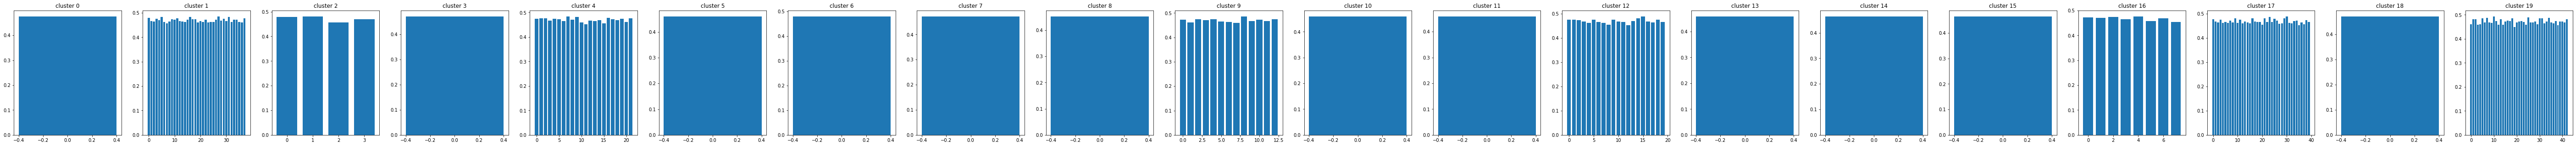

In [ ]:
#kmeans
f, axes = plt.subplots(1, len(prf.clusters), figsize=(len(prf.clusters) * 5,5))
for i in range(len(prf.clusters)):
    plot_accuracy(axes[i], prf, i)


In [ ]:
prf1.info

{0: {'accuracy': 0.4549522288254145, 'cluster_idx': 1},
 1: {'accuracy': 0.46545069031154374, 'cluster_idx': 3},
 2: {'accuracy': 0.47565160656942823, 'cluster_idx': 1},
 3: {'accuracy': 0.4673931910426508, 'cluster_idx': 3},
 4: {'accuracy': 0.4620482431461369, 'cluster_idx': 3},
 5: {'accuracy': 0.48362329583545344, 'cluster_idx': 3},
 6: {'accuracy': 0.4685552142935096, 'cluster_idx': 6},
 7: {'accuracy': 0.47740205881644276, 'cluster_idx': 6},
 8: {'accuracy': 0.46952892136783875, 'cluster_idx': 6},
 9: {'accuracy': 0.4641801939193623, 'cluster_idx': 3},
 10: {'accuracy': 0.46622819139462157, 'cluster_idx': 3},
 11: {'accuracy': 0.4745837886512338, 'cluster_idx': 6},
 12: {'accuracy': 0.47506686263643594, 'cluster_idx': 1},
 13: {'accuracy': 0.47584932438146443, 'cluster_idx': 6},
 14: {'accuracy': 0.464473109196453, 'cluster_idx': 6},
 15: {'accuracy': 0.4615591691221944, 'cluster_idx': 1},
 16: {'accuracy': 0.4731261099481115, 'cluster_idx': 3},
 17: {'accuracy': 0.47847101060022

In [ ]:
getMaxAccuracyCluster(prf1.info)

{'1': [84], '3': [75], '6': [17], '4': [39], '8': [40], '0': [93], '7': [61], '5': [63], '9': [78], '2': [85]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'1': 84}
{'3': 75}
{'6': 17}
{'4': 39}
{'8': 40}
{'0': 93}
{'7': 61}
{'5': 63}
{'9': 78}
{'2': 85}


{'1': [84],
 '3': [75],
 '6': [17],
 '4': [39],
 '8': [40],
 '0': [93],
 '7': [61],
 '5': [63],
 '9': [78],
 '2': [85]}

In [ ]:
treeList = getTreeList(X, getMaxAccuracyCluster(prf1.info))

y_preed = predict(X_test, treeList, prf1)

print("final answer = ", y_preed)
print(y_test)
  
print("Accuracy:",metrics.accuracy_score(y_test, y_preed))

{'1': [84], '3': [75], '6': [17], '4': [39], '8': [40], '0': [93], '7': [61], '5': [63], '9': [78], '2': [85]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'1': 84}
{'3': 75}
{'6': 17}
{'4': 39}
{'8': 40}
{'0': 93}
{'7': 61}
{'5': 63}
{'9': 78}
{'2': 85}
[0. 0. 1. ... 0. 0. 1.]
[0. 1. 1. ... 1. 0. 0.]
[1. 1. 0. ... 1. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 1. ... 1. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 1. ... 0. 1. 0.]
<class 'list'>
final answer =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0

In [ ]:
getMaxAccuracyCluster(prf2.info)

{'3': [33], '2': [65], '1': [61], '8': [15], '6': [43], '4': [52], '5': [58], '7': [69], '9': [73], '0': [91]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'3': 33}
{'2': 65}
{'1': 61}
{'8': 15}
{'6': 43}
{'4': 52}
{'5': 58}
{'7': 69}
{'9': 73}
{'0': 91}


{'3': [33],
 '2': [65],
 '1': [61],
 '8': [15],
 '6': [43],
 '4': [52],
 '5': [58],
 '7': [69],
 '9': [73],
 '0': [91]}

In [ ]:
treeList = getTreeList(X, getMaxAccuracyCluster(prf2.info))

y_preed = predict(X_test, treeList, prf2)

print("final answer = ", y_preed)
print(y_test)
  
print("Accuracy:",metrics.accuracy_score(y_test, y_preed))

{'3': [33], '2': [65], '1': [61], '8': [15], '6': [43], '4': [52], '5': [58], '7': [69], '9': [73], '0': [91]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'3': 33}
{'2': 65}
{'1': 61}
{'8': 15}
{'6': 43}
{'4': 52}
{'5': 58}
{'7': 69}
{'9': 73}
{'0': 91}
[0. 0. 1. ... 0. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 1.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 1. ... 0. 1. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 1.]
[0. 1. 0. ... 0. 1. 0.]
[0. 1. 0. ... 0. 0. 0.]
<class 'list'>
final answer =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [ ]:
getMaxAccuracyCluster(prf3.info)

{'2': [47], '0': [38], '3': [88], '1': [60], '8': [7], '7': [19], '6': [45], '5': [63], '9': [97], '4': [99]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'2': 47}
{'0': 38}
{'3': 88}
{'1': 60}
{'8': 7}
{'7': 19}
{'6': 45}
{'5': 63}
{'9': 97}
{'4': 99}


{'2': [47],
 '0': [38],
 '3': [88],
 '1': [60],
 '8': [7],
 '7': [19],
 '6': [45],
 '5': [63],
 '9': [97],
 '4': [99]}

In [ ]:
treeList = getTreeList(X, getMaxAccuracyCluster(prf3.info))

y_preed = predict(X_test, treeList, prf3)

print("final answer = ", y_preed)
print(y_test)
  
print("Accuracy:",metrics.accuracy_score(y_test, y_preed))

{'2': [47], '0': [38], '3': [88], '1': [60], '8': [7], '7': [19], '6': [45], '5': [63], '9': [97], '4': [99]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'2': 47}
{'0': 38}
{'3': 88}
{'1': 60}
{'8': 7}
{'7': 19}
{'6': 45}
{'5': 63}
{'9': 97}
{'4': 99}
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 1. ... 1. 0. 0.]
[0. 0. 1. ... 0. 0. 1.]
[1. 0. 1. ... 1. 0. 1.]
[1. 1. 0. ... 0. 0. 1.]
[1. 1. 0. ... 0. 1. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 1. ... 1. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
<class 'list'>
final answer =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 

In [ ]:
getMaxAccuracyCluster(prf4.info)

{'2': [33], '4': [7], '0': [73], '6': [38], '3': [57], '1': [58], '5': [65], '9': [68], '7': [71], '8': [77]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'2': 33}
{'4': 7}
{'0': 73}
{'6': 38}
{'3': 57}
{'1': 58}
{'5': 65}
{'9': 68}
{'7': 71}
{'8': 77}


{'2': [33],
 '4': [7],
 '0': [73],
 '6': [38],
 '3': [57],
 '1': [58],
 '5': [65],
 '9': [68],
 '7': [71],
 '8': [77]}

In [ ]:
treeList = getTreeList(X, getMaxAccuracyCluster(prf4.info))

y_preed = predict(X_test, treeList, prf4)

print("final answer = ", y_preed)
print(y_test)
  
print("Accuracy:",metrics.accuracy_score(y_test, y_preed))

{'2': [33], '4': [7], '0': [73], '6': [38], '3': [57], '1': [58], '5': [65], '9': [68], '7': [71], '8': [77]}
Selecting first maximum accuracy of a decision tree in each cluster:
{'2': 33}
{'4': 7}
{'0': 73}
{'6': 38}
{'3': 57}
{'1': 58}
{'5': 65}
{'9': 68}
{'7': 71}
{'8': 77}
[0. 1. 1. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 1. ... 0. 1. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 1. 0. 0.]
[0. 1. 0. ... 1. 0. 1.]
<class 'list'>
final answer =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 